In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Simulates a single roll with a given set of outcomes and probabilities
def simulateRoll(outcomes, probabilities, samples=1):
    result = random.choices(outcomes, weights=probabilities, k=samples)
    
    return result[0] if samples == 1 else result

# Adds the result of each roll to an array and returns the array
def simulateGame(numRolls, outcomes, probabilities):
    results = simulateRoll(outcomes, probabilities, numRolls)
    return results

# Plot the averages as the game progresses
def plotAverages(results):
    averages = []
    for i in range(len(results)):
        averages.append(np.mean(results[:i+1]))
    plt.plot(averages)
    plt.show()

# Machine 1
**Probability of getting $10:** 40%

**Probability of getting $0:** 60%

Average:  4.0


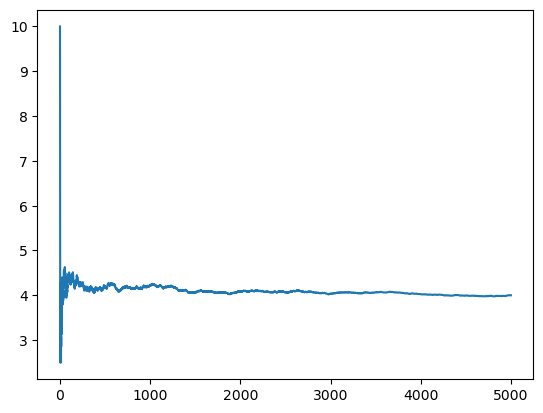

In [3]:
# Run the simulation and plot the averages
games = 5000
outcomes = [10, 0]
probabilities = [0.4, 0.6]

results = simulateGame(games, outcomes, probabilities)
print("Average: ", np.mean(results))

plotAverages(results)

# Machine 2
**Probability of getting $100:** 3%

**Probability of getting $0:** 93%

Average:  2.85


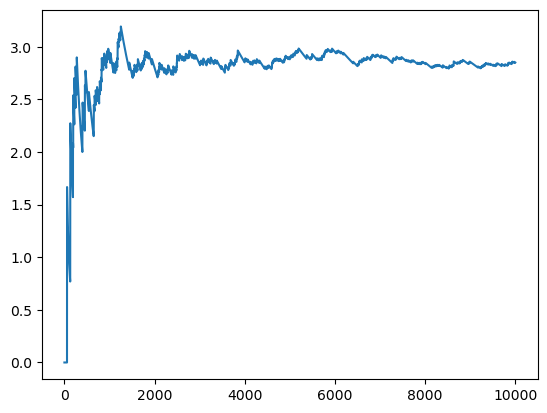

In [4]:
# Run the simulation and plot the averages
games = 10000
outcomes = [100, 0]
probabilities = [0.03, 0.97]

results = simulateGame(games, outcomes, probabilities)
print("Average: ", np.mean(results))

plotAverages(results)

## Calculating the expected value as we go

We want to update our expected value as we start getting results, not after a lot of tries

Since we don't know where where it should converge, we should notice when it stops "oscilating". We could look at the parts where the previous delta moves "a little".

In [5]:
# Calculate the expected value of the game
def calculateExpectedValue(currentIteration, previousExpectedValue, learningRate=0):
    if learningRate == 0:
        learningRate = 1/currentIteration

    expectedValue = previousExpectedValue + learningRate*(simulateRoll(outcomes, probabilities) - previousExpectedValue)

    return expectedValue

# Simulate the game and calculate the expected value
def simulateGameWithExpectedValue(outcomes, probabilities, learningRate=0):
    expectedValue = simulateRoll(outcomes, probabilities) # Our first expected value

    currentIteration = 1
    error = 1 # Just to enter the while loop
    initialIterations = 500 # This prevents the initial convergence from stopping from consecutive values
    expectedValueArray = []

    if learningRate == 0:
        for i in range(initialIterations):
            expectedValue = calculateExpectedValue(currentIteration, expectedValue)
            expectedValueArray.append(expectedValue)
            currentIteration += 1

        while abs(error) >= 0.001:
            currentIteration += 1
            previousExpectedValue = expectedValue
            expectedValue = calculateExpectedValue(currentIteration, expectedValue)
            expectedValueArray.append(expectedValue)
            error = abs(expectedValue - previousExpectedValue)

        print("\nConvergence iteration: ", currentIteration)
        print("Error: ", error)
        label = "1/k"
    
    else:
        for i in range(initialIterations):
            expectedValue = calculateExpectedValue(learningRate, expectedValue, learningRate)
            expectedValueArray.append(expectedValue)
            currentIteration += 1

        while currentIteration < 1000000 and error >= 0.001:
            currentIteration += 1
            previousExpectedValue = expectedValue
            expectedValue = calculateExpectedValue(learningRate, expectedValue, learningRate)
            expectedValueArray.append(expectedValue)
            error = abs(expectedValue - previousExpectedValue)

        print("\nConvergence iteration with learning rate ", learningRate, ": ", currentIteration)
        print("Error: ", error)
        print("Expected Value with learning rate ", learningRate, ": ", expectedValue)
        label = str(learningRate)

    expectedValueDict = {"Expected Value": expectedValue, "Expected Value Array": expectedValueArray, "Label": label}
    return expectedValueDict


# Machine 1
**Probability of getting $10:** 40%

**Probability of getting $0:** 60%


Convergence iteration:  4071
Error:  0.0009996988346285818
Expected Value:  4.068774256939322

Convergence iteration with learning rate  0.1 :  1000000
Error:  0.6201201543185517
Expected Value with learning rate  0.1 :  4.418918611133037

Convergence iteration with learning rate  0.01 :  1000000
Error:  0.0564761109734464
Expected Value with learning rate  0.01 :  4.40886501362884

Convergence iteration with learning rate  0.001 :  1000000
Error:  0.0037731420839013374
Expected Value with learning rate  0.001 :  3.769368941817505


/home/andres/miniconda3/envs/DataSciGeneral/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


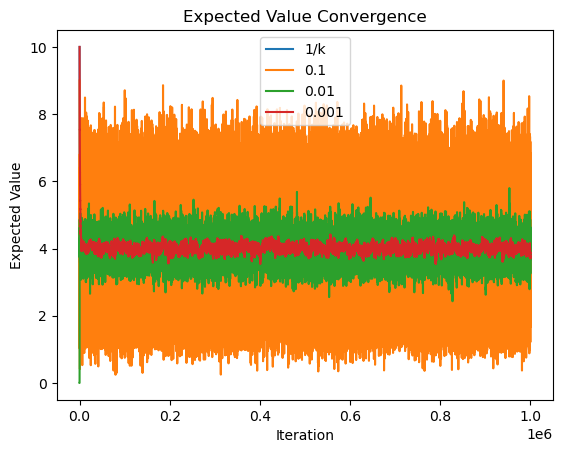

In [6]:
# Run the simulation and print the expected value
outcomes = [10, 0]
probabilities = [0.4, 0.6]
expectedValueArrays = []
labels = []

expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities)
expectedValueArrays.append(expectedValueDict["Expected Value Array"])
labels.append(expectedValueDict["Label"])
print("Expected Value: ", expectedValueDict["Expected Value"])

# Run the simulation with a fixed learning rate of 0.1, 0.01 and 0.001
for learningRate in [0.1, 0.01, 0.001]:
    expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities, learningRate)
    expectedValueArrays.append(expectedValueDict["Expected Value Array"])
    labels.append(expectedValueDict["Label"])

# Plot the expected values
plt.xlabel("Iteration")
plt.ylabel("Expected Value")
plt.title("Expected Value Convergence")
for i in range(len(expectedValueArrays)):
    plt.plot(expectedValueArrays[i], label=labels[i])
plt.legend()
plt.show()

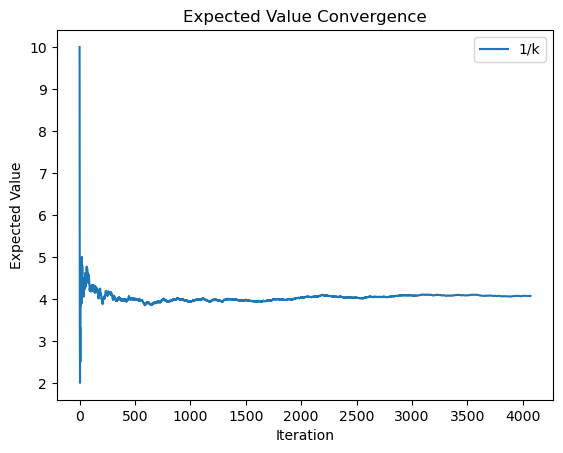

In [7]:
# Individual plots
plt.xlabel("Iteration")
plt.ylabel("Expected Value")
plt.title("Expected Value Convergence")
i = 0 # Change this to see individual plots
plt.plot(expectedValueArrays[i], label=labels[i])
plt.legend()
plt.show()

# Machine 2
**Probability of getting $100:** 3%

**Probability of getting $0:** 93%


Convergence iteration:  2451
Error:  0.0009995087386238666
Expected Value:  2.448796409628725

Convergence iteration with learning rate  0.1 :  569
Error:  0.0009556432931788154
Expected Value with learning rate  0.1 :  0.00860078963860933

Convergence iteration with learning rate  0.01 :  1000000
Error:  0.03646799011936741
Expected Value with learning rate  0.01 :  3.6103310218173585

Convergence iteration with learning rate  0.001 :  1000000
Error:  0.0023354041005827497
Expected Value with learning rate  0.001 :  2.3330686964820213


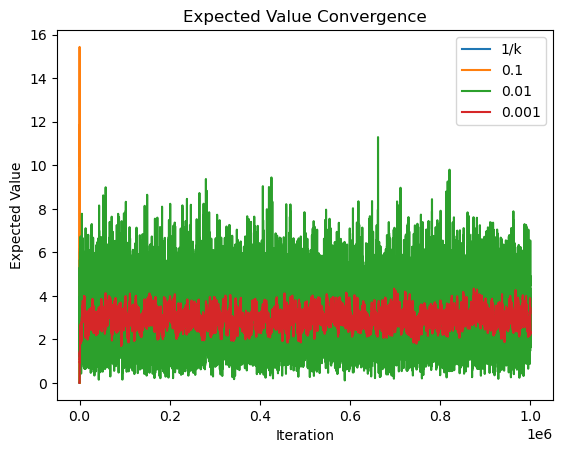

In [8]:
# Run the simulation and print the expected value
outcomes = [100, 0]
probabilities = [0.03, 0.97]
expectedValueArrays = []
labels = []

expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities)
expectedValueArrays.append(expectedValueDict["Expected Value Array"])
labels.append(expectedValueDict["Label"])
print("Expected Value: ", expectedValueDict["Expected Value"])

# Run the simulation with a fixed learning rate of 0.1, 0.01 and 0.001
for learningRate in [0.1, 0.01, 0.001]:
    expectedValueDict = simulateGameWithExpectedValue(outcomes, probabilities, learningRate)
    expectedValueArrays.append(expectedValueDict["Expected Value Array"])
    labels.append(expectedValueDict["Label"])

# Plot the expected values
plt.xlabel("Iteration")
plt.ylabel("Expected Value")
plt.title("Expected Value Convergence")
for i in range(len(expectedValueArrays)):
    plt.plot(expectedValueArrays[i], label=labels[i])
plt.legend()
plt.show()

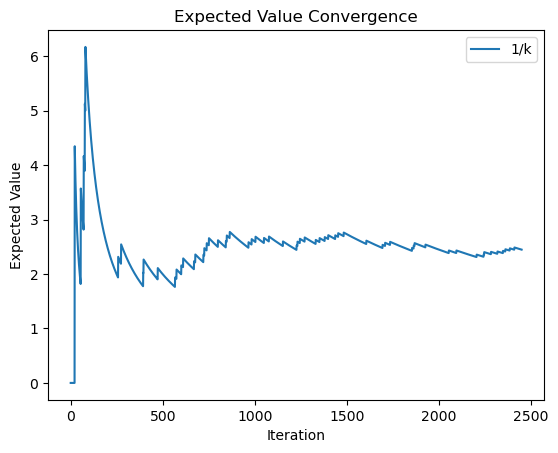

In [9]:
# Individual plots
plt.xlabel("Iteration")
plt.ylabel("Expected Value")
plt.title("Expected Value Convergence")
i = 0 # Change this to see individual plots
plt.plot(expectedValueArrays[i], label=labels[i])
plt.legend()
plt.show()